In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [2]:
class LassoRegression:
    def __init__(self, lr, epochs=1000, lambda_param=0.1):
        self.lr = lr
        self.epochs = epochs
        self.lambda_param = lambda_param

    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.bias = 0
        self.cost_history = []

        for _ in range(self.epochs):
            y_pred = X.dot(self.theta) + self.bias
            error = y_pred - y

        d_theta = (1/m) * X.T.dot(error) + self.lambda_param * np.sign(self.theta)
        d_bias = (1/m) * np.sum(error)

        self.theta -= self.lr * d_theta
        self.bias -= self.bias * d_bias

        cost = (1/(2*m)) * np.sum(error ** 2) + self.lambda_param * np.sum(np.abs(self.theta))
        self.cost_history.append(cost)

    def predict(self, X):
        return X.dot(self.theta) + self.bias
    
    def plot_cost(self):
        plt.plot(self.cost_history)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Lasso Loss Over Time")
        plt.grid(True)
        plt.show()

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X, y

(array([[ 0.93128012],
        [ 0.08704707],
        [-1.05771093],
        [ 0.31424733],
        [-0.47917424],
        [ 0.64768854],
        [-0.46341769],
        [ 0.54256004],
        [ 0.61167629],
        [ 1.0035329 ],
        [ 0.8219025 ],
        [ 1.53803657],
        [ 0.73846658],
        [-0.21967189],
        [-0.8084936 ],
        [ 0.09176078],
        [-1.95967012],
        [ 0.51326743],
        [ 1.03099952],
        [-2.6197451 ],
        [ 0.49671415],
        [ 0.09707755],
        [-0.46572975],
        [ 0.91540212],
        [ 1.56464366],
        [ 1.46564877],
        [-0.60063869],
        [-0.03582604],
        [-0.60170661],
        [-1.19620662],
        [ 0.35711257],
        [ 0.37569802],
        [ 0.26105527],
        [-0.5297602 ],
        [-0.90802408],
        [ 0.19686124],
        [-0.29900735],
        [ 0.36163603],
        [ 0.82254491],
        [-0.29169375],
        [ 0.36139561],
        [-0.676922  ],
        [ 1.52302986],
        [-0

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
model = LassoRegression(lr=0.01, epochs=1000, lambda_param=0.01)
model.fit(X_scaled, y)

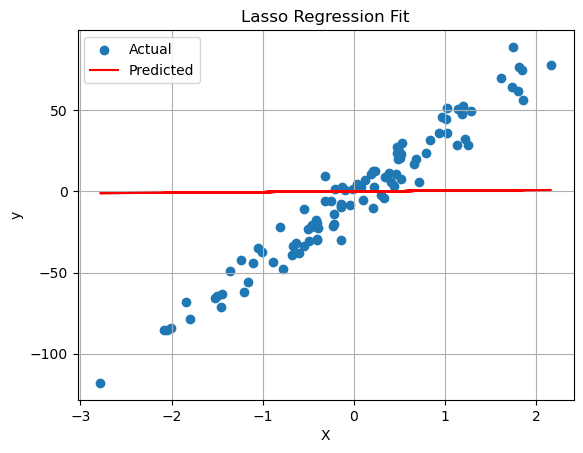

In [13]:
y_pred = model.predict(X_scaled)

plt.scatter(X_scaled, y, label="Actual")
plt.plot(X_scaled, y_pred, color='red', label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Lasso Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
